In [1]:
import matplotlib.pyplot as plt

### Đếm số học sinh thi đối với từng môn (No Pandas)

In [2]:
# plt.style.available

In [44]:
# prepare data
with open("clean_data.csv", "r", encoding="utf8") as file:
    data = file.read().split("\n")
    
header = data[0]
header_list = header.split(",")
subjects = header_list[5:]

students = data[1:]
students.pop()
students[0:5]

['02000001,Phạm Hoàng Hương Ái,04,11,2002,6.60,6.25,5.75,7.00,7.25,-1,-1,-1,5.20,-1,6.67',
 '02000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.20,7.75,7.00,7.25,8.50,-1,-1,-1,7.00,-1,7.58',
 '02000003,Lâm Nguyễn Mộng Thùy An,06,04,2001,6.80,6.75,4.75,7.75,8.25,-1,-1,-1,6.00,-1,6.92',
 '02000004,Lê Tiêu Hoàng An,18,11,2002,7.80,6.25,-1,-1,-1,7.00,5.50,6.25,5.60,6.25,-1',
 '02000005,Lư Thuận An,14,01,2002,6.40,6.50,-1,-1,-1,5.50,6.75,6.25,8.20,6.17,-1']

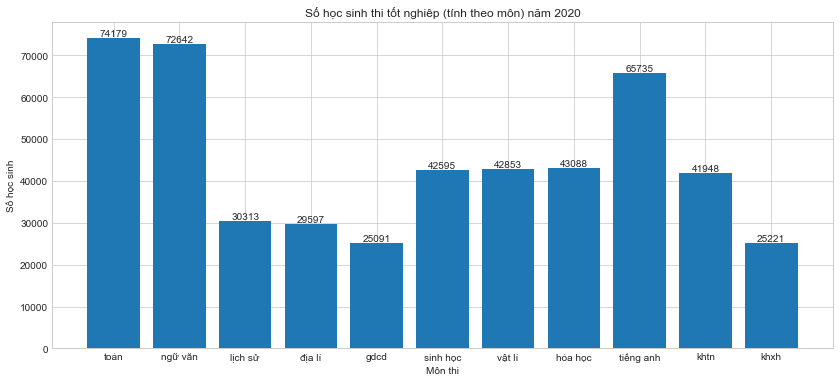

In [4]:
# Danh sách học sinh có tham gia thi 
list_student_for_subject = [0,0,0,0,0,0,0,0,0,0,0]
for student in students:
    student = student.split(",")
    for i in range(len(subjects)):
        if student[i+5] != "-1":
            list_student_for_subject[i] += 1
            
# Plot Bar Chart
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize=(14,6))

ax.bar(subjects, list_student_for_subject)
ax.set(title="Số học sinh thi tốt nghiêp (tính theo môn) năm 2020", xlabel="Môn thi", ylabel="Số học sinh")

rects = ax.patches
for rect, label in zip(rects, list_student_for_subject):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom");

### Đếm xem có bao nhiêu học sinh thi 1 môn, 2 môn, 3 môn, 4 môn.....,9 môn

In [5]:
# Đếm danh sách học sinh thi số môn [ 0 môn, 1 môn, 2 môn, ....,9 môn]
list_subject_for_student = ["Thi 0 Môn", " Thi 1 Môn", "Thi 2 Môn", "Thi 3 Môn", "Thi 4 Môn", "Thi 5 Môn", "Thi 6 Môn", "Thi 7 Môn", "Thi 8 Môn", "Thi 9 Môn"]
list_student = [0,0,0,0,0,0,0,0,0,0]
average = [0,0,0,0,0,0,0,0,0,0] # Điểm trung bình của thí sinh trong từng nhóm môn thi:

for student in students:
    student = student.split(",")
    count = 0
    total = 0
    for i in range(len(subjects) -2):
        if student[i+5] != "-1":
            total += float(student[i+5])
            count +=1
    list_student[count] +=1
    average[count] += total/count
    
#     test (Print học sinh thi 9 môn):
    if count == 9:
        print(student)
        

print(list_student)

for i in range(len(list_student)):
    if list_student[i] != 0:
        average[i] = round(average[i]/list_student[i],2)
print(average)

['02050326', 'Trần Ngọc Minh Châu', '28', '04', '2001', '6.00', '7.00', '5.50', '7.75', '8.00', '0.00', '0.00', '0.00', '5.60', '0', '7.08']
[0, 80, 122, 2605, 4496, 2879, 64261, 0, 0, 1]
[0, 5.68, 6.95, 6.58, 5.87, 6.65, 6.61, 0, 0, 4.43]


[0, 80, 122, 2605, 4496, 2879, 64261, 0, 0, 1]
[6, 4, 5, 3, 2, 1, 9, 0, 7, 8]
[64261, 4496, 2879, 2605, 122, 80, 1, 0, 0, 0]
['Thi 6 Môn', 'Thi 4 Môn', 'Thi 5 Môn', 'Thi 3 Môn', 'Thi 2 Môn', ' Thi 1 Môn', 'Thi 9 Môn', 'Thi 0 Môn', 'Thi 7 Môn', 'Thi 8 Môn']


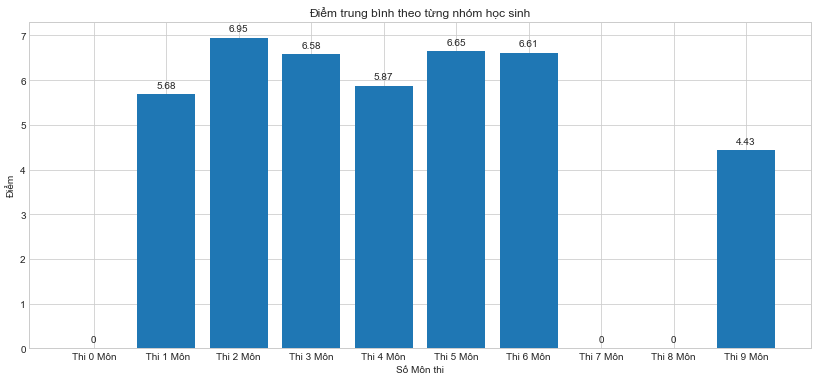

In [6]:
# Sort Option 1:

sort_list = []
sort_index = []

# sắp xếp theo thứ tự giảm dần list_student
for i in range(len(list_student)):
    max_number = 0
    for j in range(len(list_student)):
        if list_student[j] > max_number and list_student[j] not in sort_list:
            max_number = list_student[j]
    sort_list.append(max_number)

# Tạo danh sách index theo sắp xếp 
for max_num in sort_list:
    for i in range(len(list_student)):
        if list_student[i] == max_num and i not in sort_index:
            sort_index.append(i)

print(list_student)
print(sort_index)
print(sort_list)

# Sắp xếp danh sách môn thi theo thứ tự giảm dần
subject_sorted = []
for index in sort_index:
    subject_sorted.append(list_subject_for_student[index])
    
print(subject_sorted)

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(list_subject_for_student, average)
ax.set(title="Điểm trung bình theo từng nhóm học sinh", xlabel="Số Môn thi", ylabel="Điểm")

rects = ax.patches
for rect, label in zip(rects, average):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.1, label, ha="center", va="bottom");

{'Thi 0 Môn': 0, ' Thi 1 Môn': 80, 'Thi 2 Môn': 122, 'Thi 3 Môn': 2605, 'Thi 4 Môn': 4496, 'Thi 5 Môn': 2879, 'Thi 6 Môn': 64261, 'Thi 7 Môn': 0, 'Thi 8 Môn': 0, 'Thi 9 Môn': 1}


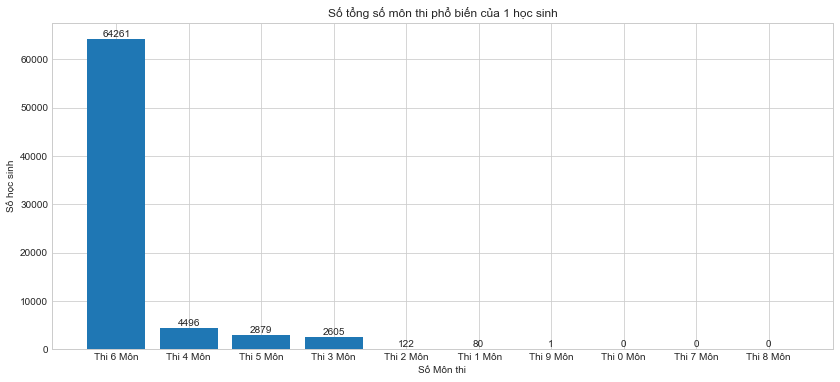

In [7]:
# Sort Option 2:
import operator

dict_list = {}
for i in range(len(list_student)):
    dict_list.update({list_subject_for_student[i]: list_student[i]})
    
print(dict_list)

# Sort Dictionary by value using itemgetter
sorted_dict = dict(sorted(dict_list.items(), key=operator.itemgetter(1), reverse=True))
# print('Sorted Dictionary: ')
# print(sorted_dict)

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(sorted_dict.keys(), sorted_dict.values())
ax.set(title="Số tổng số môn thi phổ biến của 1 học sinh", xlabel="Số Môn thi", ylabel="Số học sinh")

rects = ax.patches
for rect, label in zip(rects, sorted_dict.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom");

### Tìm độ tuổi phổ biến trong kỳ thi tốt nghiệp 2020

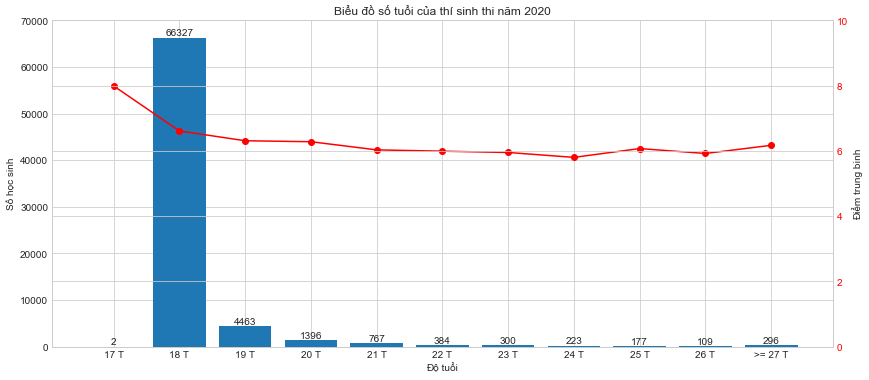

In [9]:
year = 2020
num_of_student_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]
average_of_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]
Age = ["17 T", "18 T", "19 T", "20 T", "21 T", "22 T", "23 T", "24 T", "25 T", "26 T", ">= 27 T"]

for student in students:
    student = student.split(",")
    age = year - int(student[4])
    if age >= 27:
        age = 27
    num_of_student_per_age_group[age-17] += 1
 
    sum_score = 0 # Tổng điểm
    count_score = 0 # Số môn thi
    for i in range(len(subjects) -2):
        if student[i+5] != "-1":
            sum_score += float(student[i+5])
            count_score += 1
                
    average = sum_score/count_score # điểm trung bình của mỗi học sinh
    average_of_per_age_group[age -17] += average # tổng điểm trung bình của học sinh theo nhóm tuổi

for i in range(len(average_of_per_age_group)):
    average_of_per_age_group[i] = round(average_of_per_age_group[i]/num_of_student_per_age_group[i], 2) # Điểm trung bình của học sinh theo nhóm tuổi

for i in range(len(average_of_per_age_group)):
    average_of_per_age_group[i] = average_of_per_age_group[i]*7000

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(Age, num_of_student_per_age_group)
ax.set(title="Biểu đồ số tuổi của thí sinh thi năm 2020", xlabel="Độ tuổi", ylabel="Số học sinh", ylim=(0,70000))
ax.plot(Age, average_of_per_age_group, color="red", marker="o")

ax2 = ax.twinx()
ax2.set(ylim=(0,10), ylabel="Điểm trung bình")
ax2.tick_params(axis="y", colors="r")

rects = ax.patches
for rect, label in zip(rects, num_of_student_per_age_group):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom");

### Tên phổ biến nhất trong kỳ thi tốt nghiệp 2020 

In [25]:
name = [] # Danh sách tên xuất hiện trong kỳ thi
name_count = [] # Đếm số lần xuất hiện tên tương ứng
for student in students:
    student = student.split(",")
    fname = student[1].split(" ")
    first_Name = fname[-1]
    if first_Name not in name:
        name.append(first_Name)
        name_count.append(1)
    else:
        name_count[name.index(first_Name)] += 1        

In [34]:
sort_name_count = [] # Sắp xếp theo giá trị giảm dần 
sort_name_count_index = [] # Lấy index danh sách theo giá trị giảm dần

for i in range(len(name_count)):
    max_num = 0
    for j in range(len(name_count)):
        if name_count[j] > max_num and name_count[j] not in sort_name_count:
            max_num = name_count[j]
    sort_name_count.append(max_num)
    
for max_num in sort_name_count:
    for i in range(len(name_count)):
        if name_count[i] == max_num and i not in sort_name_count_index:
            sort_name_count_index.append(i)

sorted_names = [] # danh sách tên đã sắp xếp giảm dần
sorted_name_count = [] # danh sách số lần xuất hiện của tên theo thứ tự giảm dần
for index in sort_name_count_index:   
    sorted_names.append(name[index])
    sorted_name_count.append(name_count[index])   

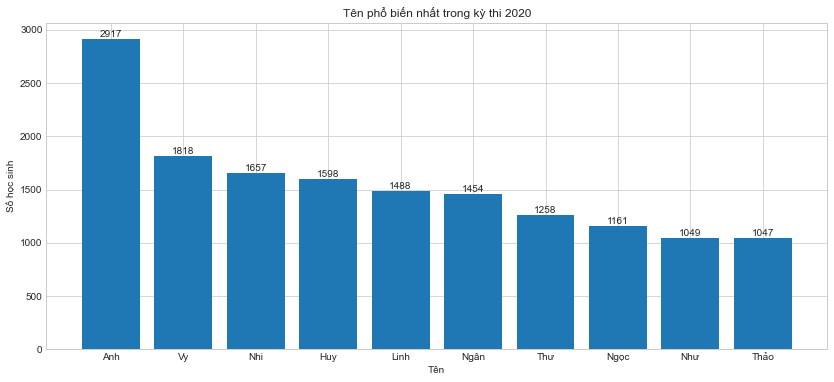

In [41]:
# Vẽ biểu đồ
num = 10

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(sorted_names[:num], sorted_name_count[:num]);
ax.set(xlabel="Tên", ylabel="Số học sinh", title="Tên phổ biến nhất trong kỳ thi 2020")

rects = ax.patches
for rect, label in zip(rects, sorted_name_count[:num]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom");